<a href="https://colab.research.google.com/github/SARATHKUMARTJ/Task-6/blob/main/MyTask_6_Ass_5%2C6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# **Assignment5**

# **Ground Cricket Chirps**
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [284]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

# **Tasks**

1.Find the linear regression equation for this data.

2.Chart the original data and the equation on the chart.

3.Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [285]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [286]:
df.shape

(15, 2)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [288]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [289]:
df.isnull()

,Chirps/Second,Ground Temperature
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [290]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [291]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [292]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [293]:
df["Chirps/Second"].quantile(0.75)

17.15

In [294]:
df["Chirps/Second"].quantile(0.25)

15.45

In [295]:
iqr = df["Chirps/Second"].quantile(0.75) -df["Chirps/Second"].quantile(0.25)
upper_threshold = df["Chirps/Second"].quantile(0.75) + (1.5 * iqr)
lower_threshold = df["Chirps/Second"].quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
print(lower_threshold)

19.699999999999996
12.9


In [296]:
df["Chirps/Second"]=df["Chirps/Second"].clip(12.9, 19.699999999999996)
df["Chirps/Second"]

0     19.7
1     16.0
2     19.7
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

Text(0, 0.5, 'Ground Temperature')

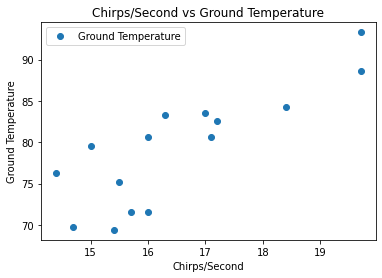

In [297]:
df.plot("Chirps/Second","Ground Temperature",style = 'o')
plt.title("Chirps/Second vs Ground Temperature")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")

In [298]:
df[["Chirps/Second","Ground Temperature"]].corr()


,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.834284
Ground Temperature,0.834284,1.000000


# **Here we have a strong correlation**

In [299]:
X=df[["Chirps/Second"]].values
y=df["Ground Temperature"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [300]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

modelling

In [301]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [302]:
print(regressor.coef_,regressor.intercept_)


[6.81853035] 79.58000000000001


In [303]:
y_pred=regressor.predict(X_test)
y_pred

array([70.84154637, 78.02901905, 76.89415494, 81.05532334, 81.43361138])

In [304]:
data=pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
0,76.3,70.841546
1,83.3,78.029019
2,71.6,76.894155
3,80.6,81.055323
4,82.6,81.433611


 **orginal data and line on chart** 

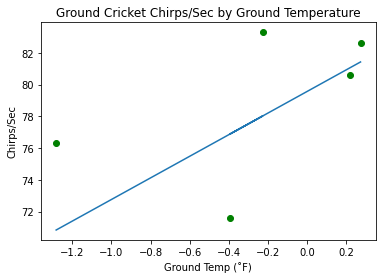

In [305]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test,y_pred )
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

## **metrics**

In [306]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.09182591023151987

# **interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [307]:
value=np.array(int(input("rate of chirping:" ))).reshape(-1,1)
regressor.predict(scaler.transform(value))


rate of chirping:18


array([84.45991566])

## the ground temperature would be 84



# **Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**



In [308]:
X=df[["Ground Temperature"]].values
y=df["Chirps/Second"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) 

In [309]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [310]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [311]:
print(regressor.coef_,regressor.intercept_)


[1.04002931] 16.46


In [312]:
y_pred=regressor.predict(X_test)


In [313]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.7896495158895034

In [314]:
value=np.array(int(input("ground temp:" ))).reshape(-1,1)
regressor.predict(scaler.transform(value))

ground temp:95


array([19.38255977])

# cricket would be chirping approximately at rate of **19.3**

# **Assignment6**

# **Brain vs. Body Weight**

# **Tasks**
1.Find the linear regression equation for this data for brain weight to body weight.

2.Chart the original data and the equation on the chart.

3.Find the equation's  score (use the .score method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [315]:
df = pd.read_fwf("brain_body.txt")

In [316]:
df.head()


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [317]:
df.shape


(62, 2)

In [318]:
df.dtypes


Brain    float64
Body     float64
dtype: object

In [319]:
df.isnull().sum()


Brain    0
Body     0
dtype: int64

In [320]:
df=df.drop_duplicates()


In [321]:
df.describe()


,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [322]:
iqr=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
lowerfence=df.Brain.quantile(0.25)-(iqr*1.5)
upperfence=df.Brain.quantile(0.75)+(iqr*1.5)
lowerfence,upperfence,iqr

(-70.80375000000001, 119.60625, 47.6025)

In [323]:
lowerfence

-70.80375000000001

In [324]:
upperfence

119.60625

In [325]:
df.Brain=df.Brain.clip(-70.80375000000001, 119.60625)

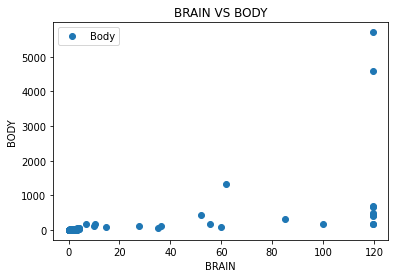

In [326]:
df.plot("Brain","Body",style="o")
plt.title("BRAIN VS BODY")
plt.xlabel("BRAIN")
plt.ylabel("BODY")
plt.show()

In [327]:
df[["Brain","Body"]].corr()


,Brain,Body
Brain,1.000000,0.510595
Body,0.510595,1.000000


here we have positive correlation

splitting the data

In [328]:
X=df[["Brain"]].values
y=df["Body"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

scalling of data

In [334]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**modelling**

In [335]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [336]:
print(regressor.intercept_,regressor.coef_)

254.29232558139537 [408.93842639]


In [337]:
y_pred=regressor.predict(X_test)

In [338]:
df1=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df1

,actual,predicted
0,0.30,-15.193232
1,3.50,-8.020328
2,5.00,-13.527085
3,21.00,18.478001
4,490.00,1110.475051
5,11.40,-0.160255
6,6.60,-5.996477
7,50.40,24.455421
8,81.00,549.385892
9,39.20,24.954324


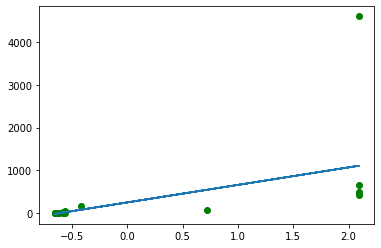

In [339]:
plt.scatter(X_test,y_test,color="g")
plt.plot(X_test,y_pred)

In [340]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.317192971406394

the given equation is not a goodfit as r2 value is not greater than 0.8 (according to task)



## **Assignment 7**


**Salary Discrimination**

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1.Sex. 1 for female, 0 for male.
2.Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

3.Year. Number of years in current rank.

4.Degree. Highest degree. 1 for doctorate, 0 for master's.
5.YSdeg. Years since highest degree was earned.
6.Salary. Salary/year in dollars.

**Tasks**

1.Find the linear regression equation for this data using columns 1-5 to column 6.

2.Find the selection of columns with the best  score.

3.Report whether sex is a factor in salary.

In [342]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])


In [343]:
df.head()


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [344]:
df.dtypes


Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [345]:
df.isnull().sum()


Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [346]:
df.shape


(52, 6)

In [347]:
df=df.drop_duplicates()


In [348]:
df.columns


Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [349]:
df.describe()


,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


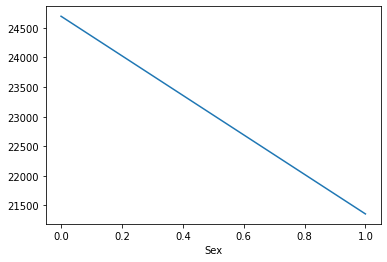

In [351]:
#df.plot("Sex","Salary",style="o")
df.groupby("Sex")["Salary"].mean().plot()
df[["Sex","Salary"]].corr()

In [352]:
df.columns


Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


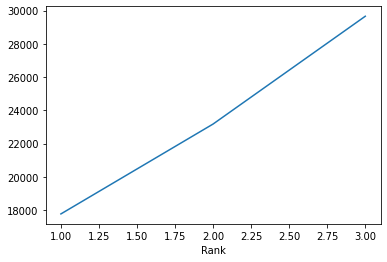

In [353]:
df.groupby('Rank')['Salary'].mean().plot()
df[["Rank","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


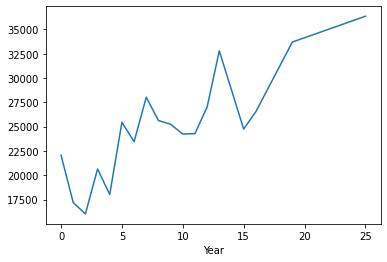

In [354]:
df.groupby('Year')['Salary'].mean().plot()
df[["Year","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


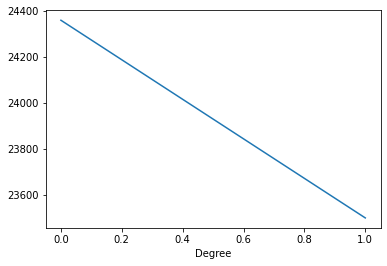

In [355]:
df.groupby('Degree')['Salary'].mean().plot()
df[["Degree","Salary"]].corr()

In [356]:
df["transformed_degree"]=np.square(df["Degree"])
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [357]:
df["transformed_degree"]=np.exp(df["Degree"])
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [358]:
df["transformed_degree"]=np.power(df["Degree"],3)
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


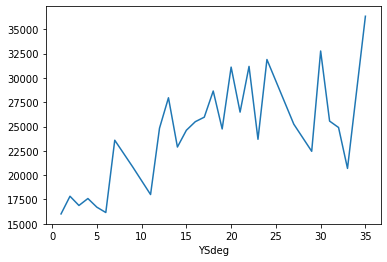

In [359]:
df.groupby('YSdeg')['Salary'].mean().plot()
df[["YSdeg","Salary"]].corr()

# **Find the linear regression equation for this data using columns 1-5 to column 6.**

**splitting of data** 

In [360]:
df.columns


Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary',
       'transformed_degree'],
      dtype='object')

In [361]:
X=df.loc[:,["Sex","Rank","Year","Degree","YSdeg"]].values
y=df["Salary"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

**scalling of data**

In [362]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**modelling**

In [363]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [364]:
print(regressor.coef_,regressor.intercept_)

[  676.82743599  5191.24711733  1802.11064977 -1139.22071075
 -1658.65941428] 23536.305555555555


In [365]:
y_pred=regressor.predict(X_test)

In [366]:
data=pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
0,36350,31846.731062
1,23725,22960.236384
2,25748,27789.089752
3,31114,29924.605715
4,24450,29520.863603
5,23712,23506.074748
6,16686,17892.914920
7,16700,16862.611543
8,25400,27314.471027
9,35350,29592.426268


In [367]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.8330597976536753

**Find the selection of columns with the best R2 score.**

In [368]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  #dict_of_r2scores= {}
  rand_st= random.randint(1, 50)
  maxR2Score= 0
  maxFeature = []

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): #feature in features
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
        #----------------------------------------
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)
        if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   #R2- Score
          maxR2Score= metrics.r2_score(Y_test,Y_pred)
          maxFeature= list(combo)
        #dict_of_r2scores[str(list(combo))] = metrics.r2_score(Y_test,Y_pred)

  print("Maximum R2 Score is for",maxFeature," and the R2 Score is:", maxR2Score)
  #for k in dict_of_r2scores.keys():
    #print(k,":", dict_of_r2scores[k])

findMaxR2Score()

Maximum R2 Score is for ['Rank', 'Year', 'Degree', 'YSdeg']  and the R2 Score is: 0.9257745104964484


**Report whether sex is a factor in salary.**

In [369]:
        X= df.loc[:,["Sex"]].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) #Random state has been added,
                                                                                                        #to get the same cobination of data for each iteration
        
       
        scaler = StandardScaler() #initialise to a variable
        
        scaler.fit(X_train,Y_train) #fit finds mean, std-deviation. 
            #NOTE: WE CAN ONLY FIND MEAN AND STANDARD DEVIATION FOR SCALING AND NORMALIZATION WITH TRAINING DATA
        
        X_train_scaled = scaler.transform(X_train) # normalizing the training data
        X_test_scaled = scaler.transform(X_test) # normalizing the test data
        #-----------------------------------------

        regressor1 = LinearRegression()  #INITIALIZATION
        regressor1.fit(X_train_scaled, Y_train)  #FITTING

        Y_pred = regressor1.predict(X_test_scaled)
       
        print(metrics.r2_score(Y_test,Y_pred))

-0.09239839064762045


**here we can see the r2 score for sex vs salary is less than 0 so we can conclude salary is not dependent on sex**



In [372]:
import seaborn as sns

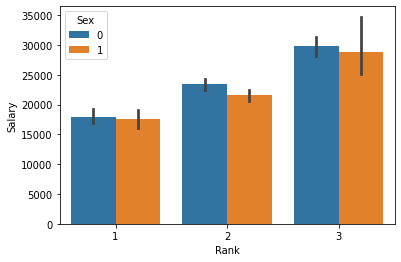

In [375]:
sns.barplot(x=df['Rank'], y= df['Salary'], hue=df['Sex'], data=df)

# As we can see there's no such difference in salary on basis of gender